# Semantic Segmentation of satellite imagery using U-Net
## Step 1: Data preparation

Adapted from the [code by Dr. Sreenivas Bhattiprolu](https://github.com/bnsreenu/python_for_microscopists/tree/master/230_landcover_dataset_segmentation) (also see the [tutorial](https://www.youtube.com/watch?v=0W6MKZqSke8))

Dataset: https://www.kaggle.com/datasets/adrianboguszewski/landcoverai?resource=download

Tasks:

1. Read large images and corresponding masks, divide them into smaller patches and write the patches as image files to the local drive.

2. Save only images and masks where masks have a relevant amount of labels needed. In this case we are especially looking for building footprints, so images with 100% woodland don't help much.

3. Split the sorted dataset from above into train and validation datasets.

4. Move files to the correctly named directories for later use with ImageDataGenerator from keras.


In [1]:
# Necessary because of a bug https://github.com/qubvel/segmentation_models/issues/374
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [2]:
import os
import shutil
import sys
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import splitfolders

In [ ]:
# Add the parent directory to the path to make imports work
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import helper functions from files in src folder
from src import plot, prepare_data

In [79]:
# Define directory paths
dir_root = Path("..")
dir_data = Path(dir_root, "data")
dir_data_landcover = Path(dir_data, "landcover_ai/")

dir_img = Path(dir_data_landcover, "images")
dir_mask = Path(dir_data_landcover, "masks")
dir_patch = Path(dir_data_landcover, "patches")
dir_patch_img = Path(dir_patch, "images")
dir_patch_mask = Path(dir_patch, "masks")
dir_patch_useful_img = Path(dir_patch, "useful/images")
dir_patch_useful_mask = Path(dir_patch, "useful/masks")

# Define file paths
inventory_path = Path(dir_data_landcover, "inventory.csv")
inventory_short_path = Path(dir_data_landcover, "inventory_short.csv")

# Create directories if they don't exist
for dir in [
    dir_data_landcover,
    dir_img,
    dir_mask,
    dir_patch,
    dir_patch_img,
    dir_patch_mask,
    dir_patch_useful_img,
    dir_patch_useful_mask,
]:
    Path(dir).mkdir(parents=True, exist_ok=True)

In [80]:
classes = {0: "Not classified", 1: "Building", 2: "Woodland", 3: "Water", 4: "Roads"}

#### Visualize the three RGB bands of a random image


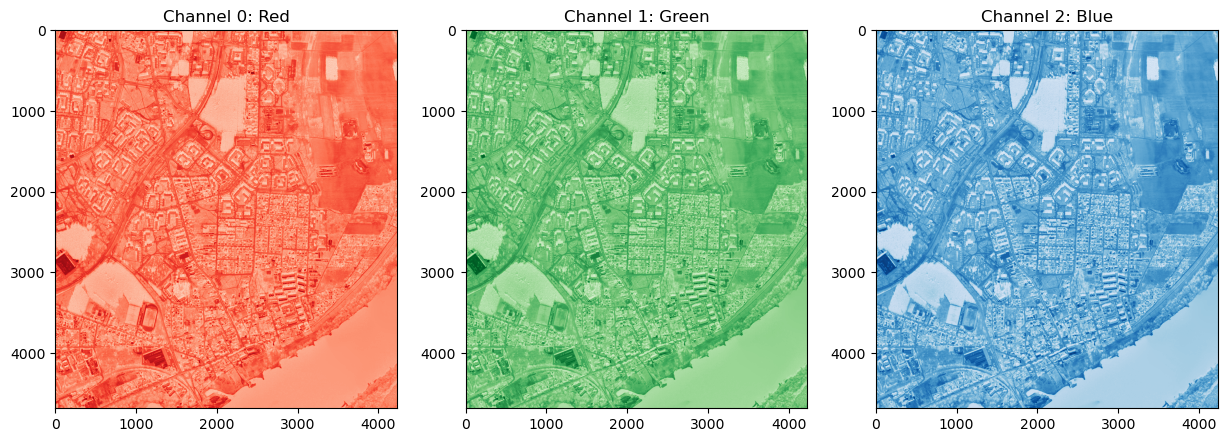

In [5]:
# Get paths of all images
img_files = [file for file in dir_img.iterdir()]

# Image with buildings
# img_path = Path(dir_img, "N-33-130-A-d-4-4.tif")

# Image with water
# img_path = Path(dir_img, "M-33-20-D-d-3-3.tif")

# Image with roads and buildings
img_path = Path(dir_img, "M-34-6-A-d-2-2.tif")

# Get random image from all images
img_path = np.random.choice(img_files)

plot.plot_image_channels(img_path)

#### Visualize the mask for the same image


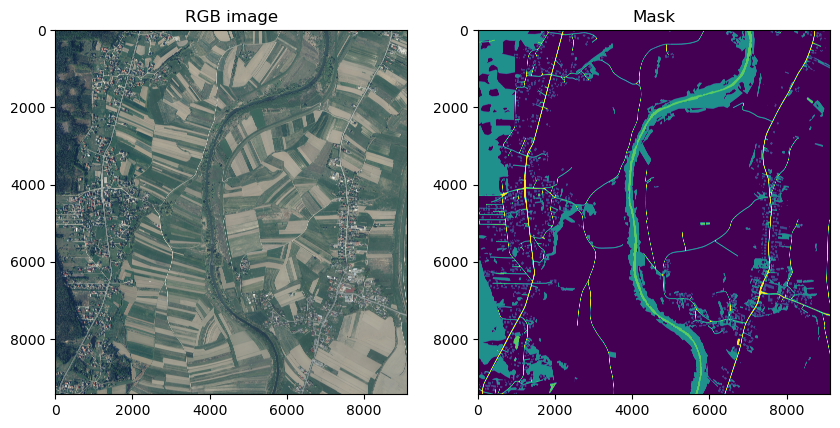

In [6]:
mask_path = Path(str(img_path).replace("/images/", "/masks/"))
plot.plot_image_and_mask(img_path, mask_path)

In [6]:
mask_path = Path(img_path.as_posix().replace("/images/", "/masks/"))
mask = cv2.imread(mask_path.as_posix())

# Can be checked for each channel. All channels are identical
labels, count = np.unique(mask[:, :, 0], return_counts=True)
print(
    f"Labels are:\n\n"
    f"{labels[0]}. Background: {count[0]:,} ({count[0]/np.sum(count):.2%})\n"
    f"{labels[1]}. Buildings: {count[1]:,} ({count[1]/np.sum(count):.2%})\n"
    f"{labels[2]}. Woodland: {count[2]:,} ({count[2]/np.sum(count):.2%})\n"
    f"{labels[3]}. Water: {count[3]:,} ({count[3]/np.sum(count):.2%})\n"
    f"{labels[4]}. Roads: {count[4]:,} ({count[4]/np.sum(count):.2%})"
)

Labels are:

0. Background: 10,759,429 (54.29%)
1. Buildings: 2,292,073 (11.57%)
2. Woodland: 1,871,729 (9.44%)
3. Water: 1,580,857 (7.98%)
4. Roads: 3,314,368 (16.72%)


### Crop each large image into patches of 256x256


In [8]:
# Run the function to create patches for images
prepare_data.create_patches(dir_img, dir_patch_img)

Patchifying image: ../data/landcover_ai/images/M-34-32-B-a-4-3.tif
Created 0 patches in ../data/landcover_ai/patches/images.
Skipped 1295 already existing patches.
Patchifying image: ../data/landcover_ai/images/N-34-140-A-b-4-2.tif
Created 0 patches in ../data/landcover_ai/patches/images.
Skipped 1258 already existing patches.
Patchifying image: ../data/landcover_ai/images/N-33-139-C-d-2-2.tif
Created 0 patches in ../data/landcover_ai/patches/images.
Skipped 1295 already existing patches.
Patchifying image: ../data/landcover_ai/images/M-33-20-D-c-4-2.tif
Created 0 patches in ../data/landcover_ai/patches/images.
Skipped 1295 already existing patches.
Patchifying image: ../data/landcover_ai/images/N-33-60-D-d-1-2.tif
Created 0 patches in ../data/landcover_ai/patches/images.
Skipped 288 already existing patches.
Patchifying image: ../data/landcover_ai/images/M-34-65-D-c-4-2.tif
Created 0 patches in ../data/landcover_ai/patches/images.
Skipped 1260 already existing patches.
Patchifying ima

In [9]:
# Run the function to create patches for masks
prepare_data.create_patches(dir_mask, dir_patch_mask)

Patchifying image: ../data/landcover_ai/masks/M-34-32-B-a-4-3.tif
Created 0 patches in ../data/landcover_ai/patches/masks.
Skipped 1295 already existing patches.
Patchifying image: ../data/landcover_ai/masks/N-34-140-A-b-4-2.tif
Created 0 patches in ../data/landcover_ai/patches/masks.
Skipped 1258 already existing patches.
Patchifying image: ../data/landcover_ai/masks/N-33-139-C-d-2-2.tif
Created 0 patches in ../data/landcover_ai/patches/masks.
Skipped 1295 already existing patches.
Patchifying image: ../data/landcover_ai/masks/M-33-20-D-c-4-2.tif
Created 0 patches in ../data/landcover_ai/patches/masks.
Skipped 1295 already existing patches.
Patchifying image: ../data/landcover_ai/masks/N-33-60-D-d-1-2.tif
Created 0 patches in ../data/landcover_ai/patches/masks.
Skipped 288 already existing patches.
Patchifying image: ../data/landcover_ai/masks/M-34-65-D-c-4-2.tif
Created 0 patches in ../data/landcover_ai/patches/masks.
Skipped 1260 already existing patches.
Patchifying image: ../data/

### Create patch inventory


In [7]:
inventory = prepare_data.create_patch_inventory(dir_patch_mask, inventory_path, classes)

File ../data/landcover_ai/inventory.csv already exists. Loading DataFrame...


In [8]:
inventory

,img,0,1,2,3,4,total,0_pct,1_pct,2_pct,3_pct,4_pct,useful_pct
0,M-33-7-A-d-3-2_patch_6_26.tif,151215.0,0.0,33630.0,0.0,11763.0,196608,0.769119,0.000000,0.171051,0.000000,0.059830,0.230881
1,N-34-77-A-b-1-4_patch_33_29.tif,168708.0,0.0,14943.0,0.0,12957.0,196608,0.858093,0.000000,0.076004,0.000000,0.065903,0.141907
2,N-33-60-D-d-1-2_patch_4_6.tif,0.0,0.0,0.0,196608.0,0.0,196608,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
3,M-34-68-B-a-1-3_patch_27_20.tif,140058.0,0.0,56550.0,0.0,0.0,196608,0.712372,0.000000,0.287628,0.000000,0.000000,0.287628
4,N-34-106-A-c-1-3_patch_25_32.tif,174219.0,0.0,0.0,22389.0,0.0,196608,0.886124,0.000000,0.000000,0.113876,0.000000,0.113876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44117,M-33-20-D-c-4-2_patch_3_22.tif,0.0,0.0,196608.0,0.0,0.0,196608,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
44118,M-34-6-A-d-2-2_patch_6_3.tif,141669.0,6603.0,0.0,0.0,48336.0,196608,0.720566,0.033585,0.000000,0.000000,0.245850,0.279434
44119,N-34-106-A-b-3-4_patch_1_33.tif,196608.0,0.0,0.0,0.0,0.0,196608,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44120,N-34-61-B-a-1-1_patch_1_13.tif,0.0,0.0,196608.0,0.0,0.0,196608,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


### Select patches containing relevant information

Copy patches and masks with real information to a new folder.


In [84]:
prepare_data.select_useful_patches(
    dir_patch_img,
    dir_patch_mask,
    dir_patch_useful_img,
    dir_patch_useful_mask,
    inventory_short_path,
    classes,
)

Added 1000 images with class 1.
Added 1000 images with class 3.
Added 1000 images with class 4.
3000 useful images in list.
0 missing in source.
3000 copied.


### Visualize classes in patches

In [85]:
inventory_useful = prepare_data.create_patch_inventory(
    dir_patch_useful_mask,
    Path(dir_data_landcover, "inventory_useful.csv"),
    classes,
    force=True,
)

Saved patch inventory to ../data/landcover_ai/inventory_useful.csv
Shorter version saved to ../data/landcover_ai/inventory_useful_short.csv


Text(0.5, 1.0, 'Roads')

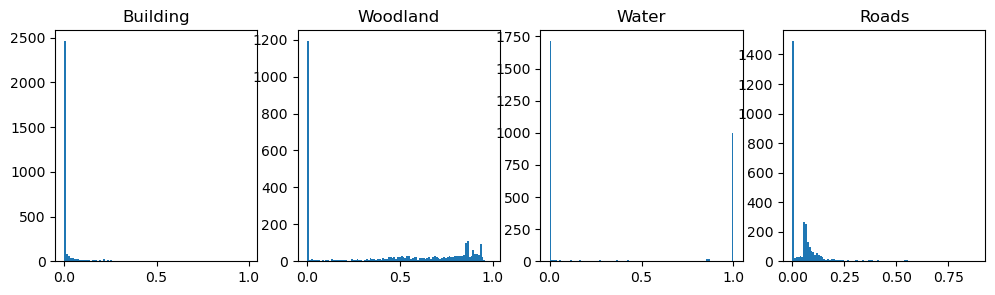

In [86]:
# Plot a histograms in subplots for 1_pct, 2_pct, 3_pct, 4_pct in inventory_useful
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].hist(inventory_useful["1_pct"], bins=100)
axs[0].set_title(classes[1])
axs[1].hist(inventory_useful["2_pct"], bins=100)
axs[1].set_title(classes[2])
axs[2].hist(inventory_useful["3_pct"], bins=100)
axs[2].set_title(classes[3])
axs[3].hist(inventory_useful["4_pct"], bins=100)
axs[3].set_title(classes[4])

In [57]:
# # Remove other classes from selected patches
# for file in dir_patch_useful_mask.iterdir():
#     mask = cv2.imread(file.as_posix())
#     mask[mask == 2] = 0
#     mask[mask == 3] = 0
#     mask[mask == 4] = 0
#     cv2.imwrite(file.as_posix(), mask)

### Plot random patch alongside its mask


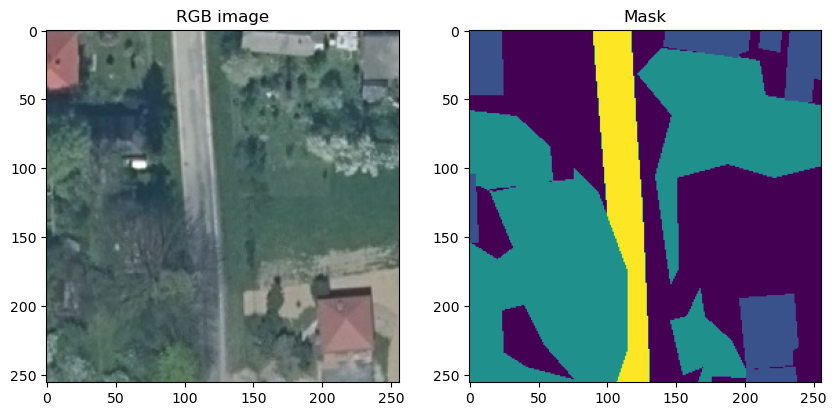

In [91]:
# Get paths of all patches
patch_files = [file for file in dir_patch_useful_img.iterdir()]

# Randomly select one of them
patch_path = np.random.choice(patch_files)

mask_path = Path(str(patch_path).replace("/images/", "/masks/"))

plot.plot_image_and_mask(patch_path, mask_path)

### Split the data into training, validation and testing


In [92]:
input_folder = Path(dir_patch, "useful")
output_folder = Path(dir_data_landcover, "tmp")

# Delete output_folder if it exists
if output_folder.is_dir():
    shutil.rmtree(str(output_folder))

for dir in [input_folder, output_folder]:
    Path(dir).mkdir(parents=True, exist_ok=True)

# Split with a ratio
# To only split into training and validation set, set a tuple to ratio, i.e, `(.8, .2)`.
splitfolders.ratio(
    input_folder, output=output_folder, seed=42, ratio=(0.75, 0.25), group_prefix=None
)

Copying files: 0 files [00:00, ? files/s]

Copying files: 6000 files [00:01, 3135.37 files/s]


### Move files to final destination


In [93]:
move_files = {
    "train/images/": "train_images/train/",
    "train/masks/": "train_masks/train/",
    "val/images/": "val_images/val/",
    "val/masks/": "val_masks/val/",
}

for source, dest in move_files.items():
    source = Path(output_folder, source)
    dest = Path(dir_data_landcover, dest)

    # Delete destination if it exists
    if dest.is_dir():
        shutil.rmtree(str(dest))

    # Make sure destination exists
    Path(dest).mkdir(parents=True, exist_ok=True)

    counter = 0

    for file in source.iterdir():
        if file.is_file():
            file.rename(Path(dest, file.name))
            counter += 1

    print(f"Moved {counter} files from {source} to {dest}.")

Moved 2250 files from ../data/landcover_ai/tmp/train/images to ../data/landcover_ai/train_images/train.
Moved 2250 files from ../data/landcover_ai/tmp/train/masks to ../data/landcover_ai/train_masks/train.
Moved 750 files from ../data/landcover_ai/tmp/val/images to ../data/landcover_ai/val_images/val.
Moved 750 files from ../data/landcover_ai/tmp/val/masks to ../data/landcover_ai/val_masks/val.


### Remove temporary directory


In [94]:
files_left = 0

# Count number of files left
for file in output_folder.rglob("*"):
    if file.is_file():
        files_left += 1

if files_left == 0:
    shutil.rmtree(output_folder)
    print(f"Removed empty directory {output_folder}.")
else:
    print(f"{output_folder} not empty, did not remove.")

Removed empty directory ../data/landcover_ai/tmp.
